# 2) Creation and basic analysis of arrays

In [ ]:
import numpy as np

## NumPy documentation

**Note: Numpy has a very good and extensive documentation, which you can find at https://numpy.org/doc/stable/. If you need any further details about numpy arrays, you can always refer to it.**

## Multiple ways of creating arrays

We have seen that we can turn regular lists into arrays with the ```array()``` function. However this becomes quickly impractical for larger arrays. Numpy offers several functions to create particular arrays.

### Common simple arrays

For example an array full of zeros or ones:

In [ ]:
one_array = np.ones(shape=(2,3))
one_array

In [ ]:
zero_array = np.zeros(shape=(2,3))
zero_array

We see here that the two functions take a ```shape``` argument that describes the shape of the output array. Indeed arrays are not just lists but can also be lists of lists!

If we obtain an array we can use the same ```shape``` property to find out the shape of an array:

In [ ]:
zero_array.shape

Let's check the ```dtype```:

In [ ]:
one_array.dtype

By default, Numpy creates float arrays. As previously, if needed, we can adjust this with the ```astype``` method.

### Complex arrays

We are not limited to creating arrays containing ones or zeros. Very common operations involve e.g. the creation of arrays containing regularly arranged numbers. For example a "from-to-by-step" list:

In [ ]:
arranged_array = np.arange(0, 10, 2)
arranged_array

Here also, we can find out what the shape of the array is as we didn't specify it explicitly. Since it's a 1D array we only get one value out:

In [ ]:
arranged_array.shape

Or a certain number of equidistant values between boundaries:

In [ ]:
np.linspace(0, 1, 10)

### Statistical arrays (optional)

Numpy offeres also many options to create arrays filled with numbers drawn from a given distribution. Most of these functions are located in a sub-module called ```np.random```. For example we can draw numbers from a Poisson distribution $P(x = k, \lambda) = \frac{\lambda^ke^{\lambda}}{k!}$

In [ ]:
poisson = np.random.poisson(lam=5, size=20)
poisson

## Loading images as arrays and displaying them

In the previous chapters, we have learned about Numpy arrays in general. These structures can hold any type of data but they are particularly ideal to store image data. Indeed in many fields such as biomedical imaging or satellite imagery, multi-dimensional data are acquired that can be easily processed as NumPy arrays.

### Importing data

There are many libraries to open image data. Some are more general and some dedicated to specific fields with specific image formats. However, most of them have in common that they import those various image formats as Numpy arrays.

Here we use the import module of scikit-image which is a general purpose image processing library for Python. We import an image directly from the internet but any local image can also be opened by using its path.

In [ ]:
import skimage.io

Here we have a fluorescence microscopy image of Saccharomyces cerevisiae with a signal accumulating in the vacuoles.

In [ ]:
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

Printing the image will only show the values on the edges of the image, since there would be too many values to display. However, we can already see that the image is a 2D array of dtype uint16.

In [ ]:
image

Let's confirm that it was imported as a Numpy array:

In [ ]:
type(image)

We see above that the tif file was indeed imported as a Numpy array. In addition we see that the pixels have unsigned (i.e., positive-only) integer 16 bits, a common format for images.

We can now check how many pixels and dimensions we have:

In [ ]:
image.shape

### Displaying arrays as images

The shape tells us that our array has 1024 lines and 1360 columns but no other dimensions. So we have a plain 2D gray-scale image. We can use the ```imshow``` function from the `pypolot` collection of `matplotlib` to display 2D arrays as images:

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(image, cmap='gray')

In addition to the ```image``` input we also used an *optional* parameter called ```cmap```. It allows us to set a certain colormap, here a gray one. You can find more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential

## Analysing arrays/images (aggregating functions)

There are different types of images when it comes to pixel values. Common ranges are 0-255 for 8-bit images, 0-65535 for 16-bit images and 0-1 for float images. In our case we have a 16-bit image, so the pixel values range from 0 to 65535.

We can check this using the aggregating functions `min()`, `max()` and `mean()`, as well as `dtype`:

In [ ]:
print("Mean:", np.mean(image))
print("Range:", np.min(image), "-", np.max(image))
print("type:", image.dtype)

We can also get an impression of the pixel values by plotting a histogram of the pixel values. This is a very common operation in image analysis. Note that we use the `flatten()` method to turn the 2D array into a 1D array, so that we can plot the histogram of all pixel values at once:

In [ ]:
plt.hist(image.flatten(), bins=100)
plt.show()

As the image is an array, we can perform operations on all values of the array at once. Like this, we can for example easily change the image to a float array and normalize the pixel values to a range between 0 and 1:

In [ ]:
image_float = image - image.min() # make the values start at 0
image_float = image_float / image_float.max() # normalize to 1
image_float = image_float.astype(np.float32) # convert to float32

print("Mean:", np.mean(image_float))
print("Range:", np.min(image_float), "-", np.max(image_float))

Let's check the pixel values:

In [ ]:
image_float

As we can see in the histogram below, the pixel values are now between 0 and 1, but the relative distribution has stayed the same.

In [ ]:
plt.hist(image_float.flatten(), bins=100)
plt.show()

## The dot notation

As we have already seen with ```astype()``` for example, Numpy arrays come with a lot of functions attached to them (methods). In particular many of the statistics functions can be called in that way. For example, with the mean, we have two options that yield the same result:

In [ ]:
print(np.mean(image))
print(image.mean())

# Exercises

1. Find out how to generate a list of 10 numbers drawn from a **normal distribution** with a mean of 10 and standard deviation of 2.

2. Create a list of 10 numbers evenly spaced between 0 and 90.

3. Assuming that the values you obtained in (2) are angles in degrees, find a function that converts degrees to radians and apply it to the array.

4. Calculate the standard deviation of the array obtained in (3). Use both a numpy function (```np.myfun```) and a method attached to the array.

In [15]:
b = np.random.normal(10, 2, 100)
b

array([ 8.38360779, 10.50543998,  9.83370559, 11.03198037, 13.11385151,
        9.32907006, 10.15805734, 11.94415763,  9.81320493, 10.75218798,
        9.86611706,  9.16701264,  9.53129494,  8.11955717, 11.32807887,
        8.51246447, 10.37078526,  9.57443897,  8.8274635 ,  9.32231699,
       13.06991975, 10.43373708, 10.79892931, 15.37225634, 10.10815158,
       15.25075611, 10.61416257, 10.49461285,  7.40811931,  6.62040169,
        8.88279945,  9.79929961, 13.38410244,  7.4890127 ,  9.69035111,
       10.5925415 ,  9.68355552,  8.76581117, 10.29335665, 11.65820384,
       10.33489155, 10.98356451, 12.49053696, 10.15624297, 12.47479958,
       13.30229599,  8.5699619 , 14.27553443, 11.38697041,  8.58428507,
        9.82640681, 12.34589484,  7.41489565, 10.69389972,  7.03425205,
        7.34671241,  8.67625497,  8.42874807,  7.41692527,  9.825879  ,
       10.83907126,  9.97965879,  9.63059429,  8.30939026, 10.06569357,
       11.46944077, 10.39515319, 10.79818071,  7.89097332,  9.35

In [18]:
b.std()

np.float64(1.8397061096239817)

(array([ 1.,  3., 12., 17., 28., 19.,  7.,  9.,  2.,  2.]),
 array([ 5.11287667,  6.13881464,  7.1647526 ,  8.19069057,  9.21662854,
        10.24256651, 11.26850447, 12.29444244, 13.32038041, 14.34631838,
        15.37225634]),
 <BarContainer object of 10 artists>)

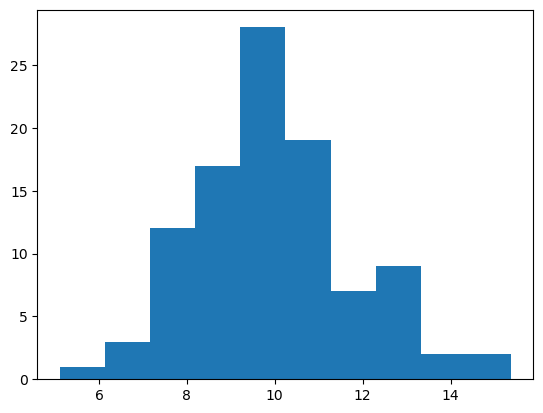

In [17]:
from matplotlib import pyplot as plt
plt.hist(b, bins=10)

In [7]:

### YOUR CODE HERE
import numpy as np
a = np.linspace(0, 90, 10)
a

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [10]:
c = np.deg2rad(a)
c

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633])

In [12]:
c.std()

np.float64(0.5013076613458392)

5. Create a 2D array of shape (20, 30) filled with random numbers drawn from a uniform distribution between 0 and 1. Use the ```np.random.uniform()``` function.

6. Display the array you created in (5) as an image using ```plt.imshow()``` and a colormap of your choice (though we recommend a sequential colormap like `gray` or `viridis`).

7. Find out the mean and the range of the pixel values in the image you created in (5). Use both a numpy function (```np.myfun```) and a method attached to the array.

8. Invert the pixel values of the image you created in (5). The range should still be between 0 and 1, but the mean should change. Check the mean before and after the inversion.

    *Hint: You can invert the pixel values by subtracting them from 1.*

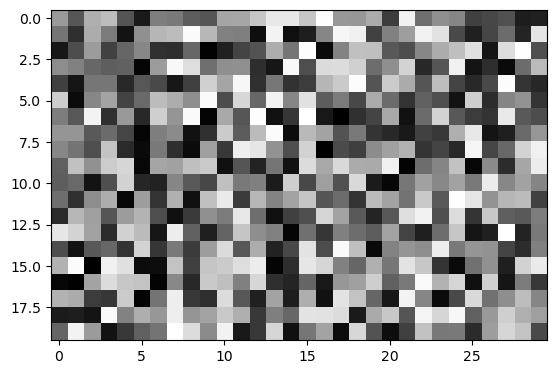

In [34]:

### YOUR CODE HERE

d = np.random.uniform(0,1,(20,30))
plt.imshow(d, cmap="gray")



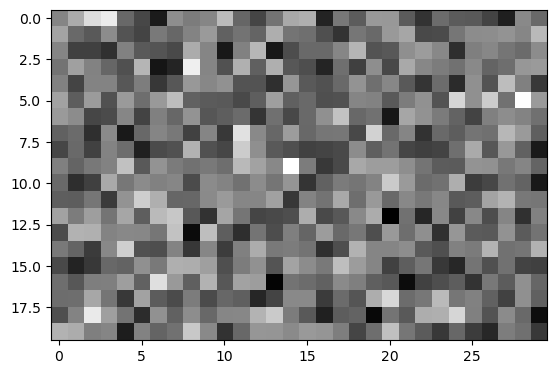

In [66]:
e = np.random.normal(0,1,(20,30))
plt.imshow(e, cmap="gray")

(array([  4.,  13.,  29.,  91., 125., 145., 102.,  67.,  20.,   4.]),
 array([-3.09168106, -2.50561999, -1.91955892, -1.33349786, -0.74743679,
        -0.16137572,  0.42468535,  1.01074642,  1.59680749,  2.18286855,
         2.76892962]),
 <BarContainer object of 10 artists>)

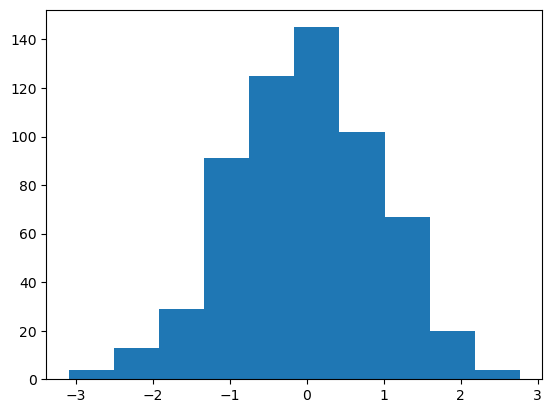

In [43]:
e = e.flatten()
plt.hist(e, bins=10)

In [54]:
#7. Find out the mean and the range of the pixel values in the image you created in (5). Use both a numpy function (```np.myfun```) and a method attached to the array.

print("Mean:", d.mean())
print("Min:", d.min())
print("Max:", d.max())

Mean: 0.492037970909586
Min: 0.003289200056759256
Max: 0.9996482271803324


In [73]:
#Invert the pixel values of the image you created in (5). The range should still be between 0 and 1, but the mean should change. Check the mean before and after the inversion.
i = (d - 1) * -1
print("Mean:", i.mean())
print("Min:", i.min())
print("Max:", i.max())

Mean: 0.5079620290904139
Min: 0.000351772819667584
Max: 0.9967107999432407


9. (Optional) Have a close look at the individual pixel values and the mean of the images before and after the inversion. What do you observe? Can you explain it? You can also plot the histograms of the pixel values before and after the inversion to visualize the change.

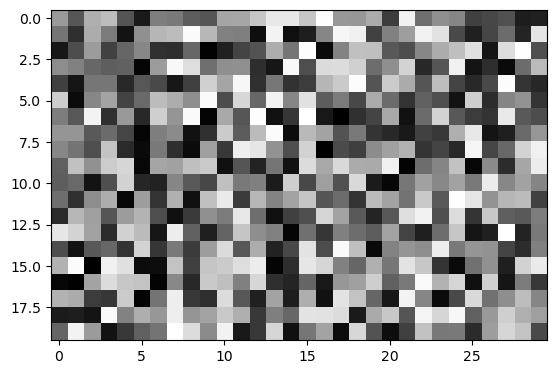

In [64]:
plt.imshow(d, cmap="gray")


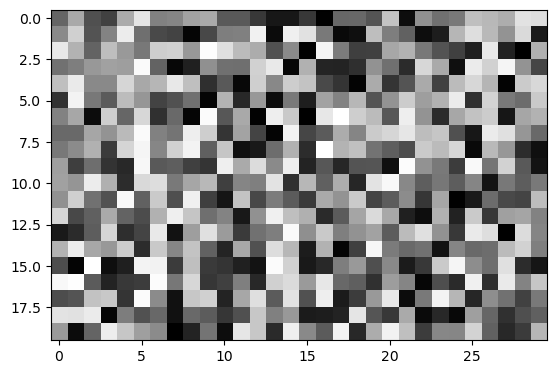

In [74]:
plt.imshow(i, cmap="gray")

In [70]:
g = np.random.normal(0,1,(500, 500, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.162799804889682..4.683514591381308].


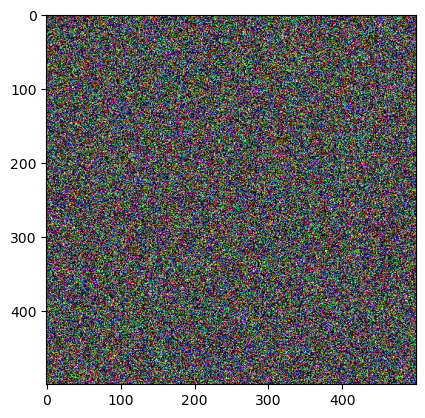

In [71]:
plt.imshow(g)

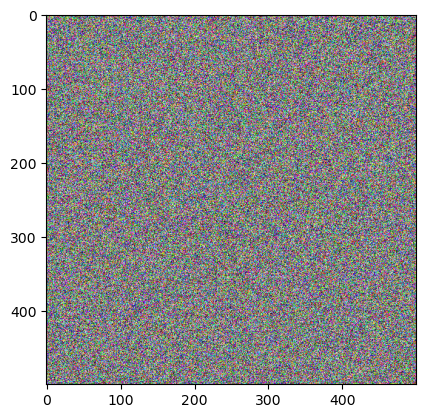

In [72]:
h = np.random.uniform(0,1,(500, 500, 3))
plt.imshow(h)